<a href="https://colab.research.google.com/github/saud-py/DSA-Practise/blob/main/ALML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement AO* algorithm

In [1]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode): #instantiate graph object with graph topology, heuristic values, start node

        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}

    def applyAOStar(self): # starts a recursive AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v): # gets the Neighbors of a given node
        return self.graph.get(v,'')

    def getStatus(self,v): # return the status of a given node
        return self.status.get(v,0)

    def setStatus(self,v, val): # set the status of a given node
        self.status[v]=val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) # always return the heuristic value of a given node

    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value # set the revised heuristic value of a given node


    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE STARTNODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")

    def computeMinimumCostChildNodes(self, v): # Computes the Minimum Cost of child nodes of a given node v
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v): # iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
        
            if flag==True: # initialize Minimum Cost with the cost of first set of child node/s
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s
                flag=False
            else: # checking the Minimum Cost nodes with the current Minimum Cost
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s


        return minimumCost, costToChildNodeListDict[minimumCost] # return Minimum Cost and Minimum Cost child node/s


    def aoStar(self, v, backTracking): # AO* algorithm for a start node and backTracking status flag

        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)

        print("-----------------------------------------------------------------------------------------")
    
        if self.getStatus(v) >= 0: # if status node v >= 0, compute Minimum Cost nodes of v
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))

            solved=True # check the Minimum Cost nodes of v are solved
        
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False

            if solved==True: # if the Minimum Cost nodes of v are solved, set the current node status as solved(-1)
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList # update the solution graph with the solved nodes which may be a part of solution


            if v!=self.start: # check the current node is the start node for backtracking the current node value
                self.aoStar(self.parent[v], True) # backtracking the current node value with backtracking status set to true

            if backTracking==False: # check the current call is not for backtracking
                for childNode in childNodeList: # for each Minimum Cost child node
                    self.setStatus(childNode,0) # set the status of child node to 0(needs exploration)
                    self.aoStar(childNode, False) # Minimum Cost child node is further explored with backtracking status as false



h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J':1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7} # Heuristic values of Nodes
graph2 = { # Graph of Nodes and Edges
    'A': [[('B', 1), ('C', 1)], [('D', 1)]], # Neighbors of Node 'A', B, C & D with repective weights
    'B': [[('G', 1)], [('H', 1)]], # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]] # Each sublist indicate a "OR" node or "AND" nodes
}

G2 = Graph(graph2, h2, 'A') # Instantiate Graph object with graph, heuristic values and start Node
G2.applyAOStar() # Run the AO* algorithm
G2.printSolution() # print the solution graph as AO* Algorithm search


HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C':

Implement A* algorithm

In [ ]:
def aStarAlgo(start_node, stop_node):    
        open_set = set(start_node) 
        closed_set = set()
        g = {} 
        parents = {}
        g[start_node] = 0
        parents[start_node] = start_node         
        while len(open_set) > 0:
            n = None
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v                   
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n): 
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                path.append(start_node)
                path.reverse()
                print('Path found: {}'.format(path))
                return path
            open_set.remove(n)
            closed_set.add(n)
        print('Path does not exist!')
        return None
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
def heuristic(n):
        H_dist = {
             'A': 11,
             'B': 6,
             'C': 99,
             'D': 1,
             'E': 7,
             'G': 0,
             }
        return H_dist[n]
Graph_nodes = {
 'A': [('B', 2), ('E', 3)],
 'B': [('C', 1), ('G', 9)],
 'C': None,
 'E': [('D', 6)],
 'D': [('G', 1)],
}
aStarAlgo('A', 'G')


Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

4) Write a program to demonstrate the working of the decision tree based ID3 algorithm use an appropriate dataset for builiding the decision tree and apply the knowledge to classify a new example

In [ ]:
import math 
import csv 

def load_csv(filename): 
  lines = csv.reader(open("data3.csv", "r"))
  dataset = list(lines)
  headers = dataset.pop(0)
  return dataset, headers

class Node:
  def __init__(self, attribute) :
    self.attribute = attribute
    self.children = []
    self.answer = ""

def subtables(data, col, delete) : 
  dic = {}
  coldata = [row[col] for row in data] 
  attr=list(set(coldata))
  for k in attr: 
    dic[k] = []
  for y in range(len(data)): 
    key = data[y][col]
    if delete: 
      del data[y][col]
    dic[key].append(data[y])
  return attr, dic

def entropy(S): 
  attr=list(set(S)) 
  if len(attr) == 1:
    return 0
  counts =[0,0]
  for i in range(2):
    counts[i]=sum([1 for x in S if attr[i] == x])/(len(S)*1.0)   
  sums=0
  for cnt in counts: 
    sums+= -1*cnt*math.log(cnt, 2) 
  return sums

def compute_gain(data, col): 
   attValues, dic=subtables(data, col, delete=False) 
   total_entropy = entropy([row[-1] for row in data])
   for x in range(len(attValues)):
     ratio = len(dic[attValues[x]])/(len(data)*1.0)
     entro = entropy([row[-1] for row in dic[attValues[x]]]) 
     total_entropy-= ratio*entro 
   return total_entropy

def build_tree(data,features) :
  lastcol=[row[-1] for row in data] 
  if (len(set(lastcol))) == 1: 
    node=Node("")
    node.answer = lastcol[0]
    return node
  n = len(data[0])-1
  gains =[compute_gain(data, col) for col in range(n) ] 
  split=gains.index(max(gains))
  node=Node(features[split])

  fea=features[:split]+features[split+1:]
  attr, dic = subtables(data, split, delete=True)
  for x in range(len(attr)): 
    child = build_tree(dic[attr[x]], fea) 
    node.children.append((attr[x], child))
  return node 

def print_tree (node, level) :
  if node.answer!= "":
    print(" "*level, node.answer)
    return
  print(" "*level, node.attribute) 
  for value, n in node.children:
    print(" "*(level+1), value)
    print_tree (n, level + 2) 


def classify (node,x_test,features):
  if node.answer!="" :
    print(node.answer)
    return
  pos = features.index(node.attribute)
  for value, n in node.children:
    if x_test[pos]==value:
        classify(n,x_test, features)



dataset, features = load_csv("id3.csv")
node = build_tree(dataset, features) 
print("The decision tree for the dataset using ID3 algorithm is ")
print_tree(node, 0)
testdata, features =load_csv("id3.csv") 
for xtest in testdata: 
  print("The test instance xtest",xtest)
  print("The predicted labe1 ", end="" )
  classify(node, xtest,features) 


The decision tree for the dataset using ID3 algorithm is 
 outlook
  rain
   wind
    weak
     yes
    strong
     no
  sunny
   humidity
    normal
     yes
    high
     no
  overcast
   yes
The test instance xtest ['sunny', 'hot', 'high', 'weak', 'no']
The predicted labe1 no
The test instance xtest ['sunny', 'hot', 'high', 'strong', 'no']
The predicted labe1 no
The test instance xtest ['overcast', 'hot', 'high', 'weak', 'yes']
The predicted labe1 yes
The test instance xtest ['rain', 'mild', 'high', 'weak', 'yes']
The predicted labe1 yes
The test instance xtest ['rain', 'cool', 'normal', 'weak', 'yes']
The predicted labe1 yes
The test instance xtest ['rain', 'cool', 'normal', 'strong', 'no']
The predicted labe1 no
The test instance xtest ['overcast', 'cool', 'normal', 'strong', 'yes']
The predicted labe1 yes
The test instance xtest ['sunny', 'mild', 'high', 'weak', 'no']
The predicted labe1 no
The test instance xtest ['sunny', 'cool', 'normal', 'weak', 'yes']
The predicted labe1 yes

3) For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithmto output a description of the set of all hypotheses consistent with the training examples.

In [ ]:
import csv
a = []
print("\n The Given Training Data Set \n")

with open('/content/ws - ws.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append (row)
        print(row)
num_attributes = len(a[0])-1

print("\n The initial value of hypothesis: ")
S = ['0'] * num_attributes
G = ['?'] * num_attributes
print ("\n The most specific hypothesis S0 : [0,0,0,0,0,0]\n")
print (" \n The most general hypothesis G0 : [?,?,?,?,?,?]\n")
for j in range(0,num_attributes):
       S[j] = a[0][j];
print("\n Candidate Elimination algorithm  Hypotheses Version Space Computation\n")
temp=[]

for i in range(0,len(a)):
    print("------------------------------------------------------------------------------")
    if a[i][num_attributes]=='Yes':
        for j in range(0,num_attributes):
            if a[i][j]!=S[j]:
                S[j]='?'
                           
        for j in range(0,num_attributes):
            for k  in range(1,len(temp)):
                if temp[k][j]!= '?' and temp[k][j] !=S[j]:
                    print(temp[k])
                    del temp[k]
        
        print(" For Training Example No :{0} the hypothesis is S{0}  ".format(i+1),S)
        if (len(temp)==0):
            print(" For Training Example No :{0} the hypothesis is G{0} ".format(i+1),G)
        else:    
            print(" For Training Example No :{0} the hypothesis is G{0}".format(i+1),temp)
    
    if a[i][num_attributes]=='No':
        for j in range(0,num_attributes):
             if S[j] != a[i][j] and S[j]!= '?':
                 G[j]=S[j]
                 temp.append(G)
                 G = ['?'] * num_attributes
                 
        print(" For Training Example No :{0} the hypothesis is S{0} ".format(i+1),S)
        print(" For Training Example No :{0} the hypothesis is G{0}".format(i+1),temp)   



 The Given Training Data Set 

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']

 The initial value of hypothesis: 

 The most specific hypothesis S0 : [0,0,0,0,0,0]

 
 The most general hypothesis G0 : [?,?,?,?,?,?]


 Candidate Elimination algorithm  Hypotheses Version Space Computation

------------------------------------------------------------------------------
 For Training Example No :1 the hypothesis is S1   ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
 For Training Example No :1 the hypothesis is G1  ['?', '?', '?', '?', '?', '?']
------------------------------------------------------------------------------
 For Training Example No :2 the hypothesis is S2   ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 For Training Example No :2 the hypothesis is G2  ['?', '?', '?', '?', '

5) Build an Artificial Neural Network by implementing by Backpropagation algorithm and test the same using appropriate datasets

In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    
#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    
#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    
# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    
    
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89412612]
 [0.88012744]
 [0.89523934]]


6) Write a program to implement the naive Bayesian classifier for a sample training dataset stored in a CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [ ]:
import numpy as np
import math
import csv

def read_data(filename):

    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile)
        metadata = next(datareader)
        traindata=[]
        for row in datareader:
            traindata.append(row)
    
    return (metadata, traindata)

def splitDataset(dataset, splitRatio):         #splits dataset to training set and test set based on split ratio
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	testset = list(dataset)
	i=0
	while len(trainSet) < trainSize:
	    trainSet.append(testset.pop(i))
	return [trainSet, testset]
       
def classify(data,test):
    
    total_size = data.shape[0]
    print("training data size=",total_size)
    print("test data sixe=",test.shape[0])
    target=np.unique(data[:,-1])
    count = np.zeros((target.shape[0]), dtype=np.int32)    
    prob = np.zeros((target.shape[0]), dtype=np.float32)
    print("target   count  probability")
    for y in range(target.shape[0]):
        for x in range(data.shape[0]):
            if data[x,data.shape[1]-1] == target[y]:
                count[y] += 1
        prob[y]=count[y]/total_size    # comptes the probability of target
        print(target[y],"\t",count[y],"\t",prob[y])
    
    prob0 = np.zeros((test.shape[1]-1), dtype=np.float32)
    prob1 = np.zeros((test.shape[1]-1), dtype=np.float32)
    accuracy=0
    print("Instance prediction taget")    
    for t in range(test.shape[0]):
        for k in range(test.shape[1]-1):  # for each attribute in column
            count1=count0=0
            for j in range(data.shape[0]):
                if test[t,k]== data[j,k] and data[j,data.shape[1]-1]== target[0]:
                    count0+=1
                elif test[t,k]== data[j,k] and data[j,data.shape[1]-1]== target[1]:
                    count1+=1
            prob0[k]= count0/count[0]        #Find no probability of each attribute
            prob1[k]= count1/count[1]       #Find yes probability of each attribute
            

        probno=prob[0]
        probyes=prob[1]
        for i in range(test.shape[1]-1):
             probno=probno*prob0[i]
             probyes=probyes*prob1[i]
        
        
        if probno>probyes:     # prediction
            predict='no'
        else:
            predict='yes'
        print(t+1,"\t",predict,"\t    ",test[t,test.shape[1]-1])

        
        if predict== test[t,test.shape[1]-1]:     # computing accuracy
           accuracy+=1
        
    final_accuracy=(accuracy/test.shape[0])*100
    print("accuracy",final_accuracy,"%")

    return  

metadata, traindata = read_data("tennis.csv")
splitRatio = 0.6
trainingset, testset = splitDataset(traindata, splitRatio)
training=np.array(trainingset)
testing=np.array(testset)
print("------------------Training Data-------------------")
print(trainingset)
print("-------------------Test Data-------------------")
print(testset)

classify(training,testing)


------------------Training Data-------------------
[['sunny', 'hot', 'high', 'Weak', 'no'], ['sunny', 'hot', 'high', 'Strong', 'no'], ['overcast', 'hot', 'high', 'Weak', 'yes'], ['rainy', 'mild', 'high', 'Weak', 'yes'], ['rainy', 'cool', 'normal', 'Weak', 'yes'], ['rainy', 'cool', 'normal', 'Strong', 'no'], ['overcast', 'cool', 'normal', 'Strong', 'yes'], ['sunny', 'mild', 'high', 'Weak', 'no']]
-------------------Test Data-------------------
[['sunny', 'cool', 'normal', 'Weak', 'yes'], ['rainy', 'mild', 'normal', 'Weak', 'yes'], ['sunny', 'mild', 'normal', 'Strong', 'yes'], ['overcast', 'mild', 'high', 'Strong', 'yes'], ['overcast', 'hot', 'normal', 'Weak', 'yes'], ['rainy', 'mild', 'high', 'Strong', 'no']]
training data size= 8
test data sixe= 6
target   count  probability
no 	 4 	 0.5
yes 	 4 	 0.5
Instance prediction taget
1 	 no 	     yes
2 	 yes 	     yes
3 	 no 	     yes
4 	 yes 	     yes
5 	 yes 	     yes
6 	 no 	     no
accuracy 66.66666666666666 %


7) Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

     Driver_ID  Distance_Feature  Speeding_Feature
0   3423311935             71.24                28
1   3423313212             52.53                25
2   3423313724             64.54                27
3   3423311373             55.69                22
4   3423310999             54.58                25
5   3423313857             41.91                10
6   3423312432             58.64                20
7   3423311434             52.02                 8
8   3423311328             31.25                34
9   3423312488             44.31                19
10  3423311254             49.35                40
11  3423312943             58.07                45
12  3423312536             44.22                22
13  3423311542             55.73                19
14  3423312176             46.63                43
15  3423314176             52.97                32
16  3423314202             46.25                35
17  3423311346             51.55                27
18  3423310666             57.0

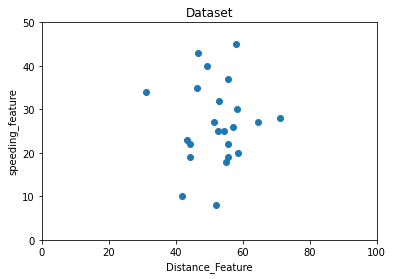

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[]

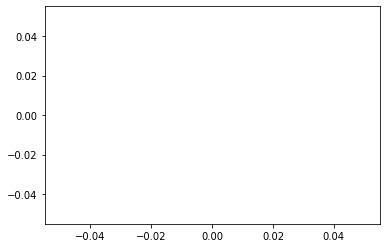

In [ ]:
from sklearn.cluster import KMeans 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
data=pd.read_csv("EM_Algorithm.csv") 
df1=pd.DataFrame(data) 
print(df1) 
f1 = df1['Distance_Feature'].values 
f2 = df1['Speeding_Feature'].values 
X=np.matrix(list(zip(f1,f2))) 
plt.plot() 
plt.xlim([0, 100]) 
plt.ylim([0, 50]) 
plt.title('Dataset') 
plt.ylabel('speeding_feature') 
plt.xlabel('Distance_Feature') 
plt.scatter(f1,f2) 
plt.show() 
plt.plot() 
colors = ['b', 'g', 'r'] 
markers = ['o', 'v', 's'] 
kmeans_model = KMeans(n_clusters=3).fit(X) 
plt.plot() 


8) Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
  print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
  print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))
  print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [4.4 2.9 1.4 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [4.8 3.  1.4 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.7 3.8 1.7 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.7 2.5 5.  2. ]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [5.2 2.7 3.9 1.4]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [7.2 3.  5.8 1.6]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [6.4 2.8 5.6 2.1]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [5.2 3.4 1.4 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [4.6 3.2 1.4 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.9 3.  4.2 1.5

9) Implement the non-parametric locally weighted regression algorithm in order to fit data points. Select appropriate dataset for your experiment and draw graphs

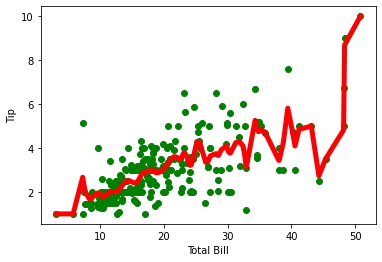

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat,k):
  m,n=np.shape(xmat)
  weights=np.mat(np.eye((m)))
  for j in range(m):
    diff=point-x[j]
    weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
  return weights
def localWeight(point,xmat,ymat,k):
  wei=kernel(point,xmat,k)
  w=(x.T*(wei*x)).I*(x.T*(wei*ymat.T))
  return w
def localWeightRegression(xmat,ymat,k):
  m,n=np.shape(xmat)
  ypred=np.zeros(m)
  for i in range(m):
    ypred[i]=xmat[i]*localWeight(xmat[i], xmat, ymat, k)
  return ypred

data=pd.read_csv('tips.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
x=np.hstack((one.T,mbill.T))
ypred=localWeightRegression(x,mtip,0.5)
sortIndex=x[:,1].argsort(0)
xsort=x[sortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()